Amirhossein Shanaghi

student id:810899056

Gradient projection 

Gradient Projection Method Results:
          x1            x2            x3
0  -2.000000 -1.000000e+00 -1.000000e+00
1  -1.000000 -4.000000e-01 -4.000000e-01
2  -0.768000 -2.400000e-01 -2.400000e-01
3  -0.602880 -1.551360e-01 -1.551360e-01
4  -0.477491 -1.054031e-01 -1.054031e-01
5  -0.379770 -7.425670e-02 -7.425670e-02
6  -0.302714 -5.376526e-02 -5.376526e-02
7  -0.241593 -3.975711e-02 -3.975711e-02
8  -0.192958 -2.988468e-02 -2.988468e-02
9  -0.154188 -2.275445e-02 -2.275445e-02
10 -0.123247 -1.750187e-02 -1.750187e-02
11 -0.098536 -1.357008e-02 -1.357008e-02
12 -0.078792 -1.058864e-02 -1.058864e-02
13 -0.063011 -8.304051e-03 -8.304051e-03
14 -0.050395 -6.538591e-03 -6.538591e-03
15 -0.040308 -5.164970e-03 -5.164970e-03
16 -0.032241 -4.090339e-03 -4.090339e-03
17 -0.025789 -3.245896e-03 -3.245896e-03
18 -0.020629 -2.579975e-03 -2.579975e-03
19 -0.016502 -2.053335e-03 -2.053335e-03
20 -0.013201 -1.635891e-03 -1.635891e-03
21 -0.010560 -1.304394e-03 -1.304394e-03
22 -0.008448 -1.04076

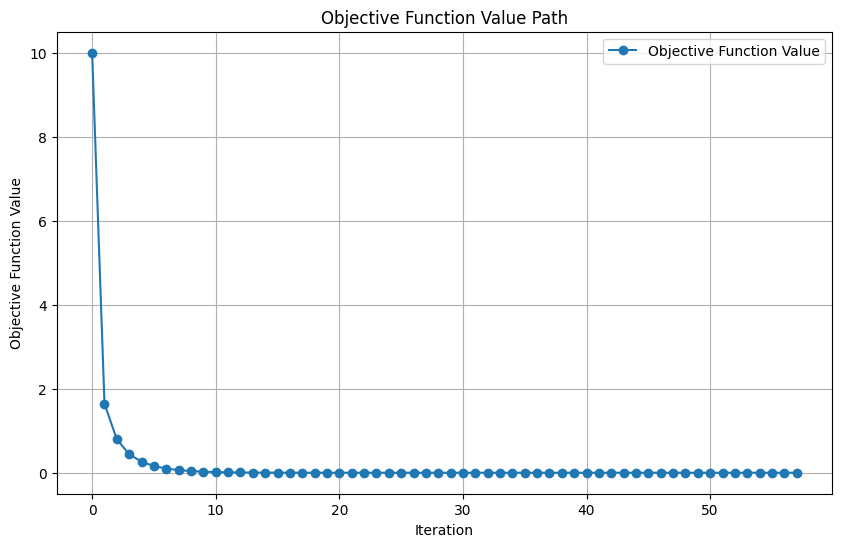

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def objective_function(x):
    return x[0]**2 + x[1]**2 + x[2]**2 - 2*x[0]*x[1]*x[2]

def gradient_projection_method(initial_x, step_size, max_iter=1000, tol=1e-6):
    x = np.array(initial_x, dtype=float)
    history = [x.copy()]
    obj_history = [objective_function(x)]

    for _ in range(max_iter):
        grad = np.array([2*x[0] - 2*x[1]*x[2],
                         2*x[1] - 2*x[0]*x[2],
                         2*x[2] - 2*x[0]*x[1]])

        x_next = x - step_size * grad

        x_next[0] = max(x_next[0], -1)
        x_next[1] = max(x_next[1], -2)
        x_next[2] = max(x_next[2], -3)

        history.append(x_next.copy())
        obj_history.append(objective_function(x_next))

        if np.linalg.norm(x_next - x) < tol:
            break

        x = x_next

    return np.array(history), obj_history

initial_x = [-2, -1, -1]
step_size = 0.1

result, obj_history = gradient_projection_method(initial_x, step_size)
df_result = pd.DataFrame(result, columns=['x1', 'x2', 'x3'])

print("Gradient Projection Method Results:")
print(df_result)

plt.figure(figsize=(10, 6))
plt.plot(iterations, obj_history, label='Objective Function Value', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value Path')
plt.legend()
plt.grid(True)
plt.show()


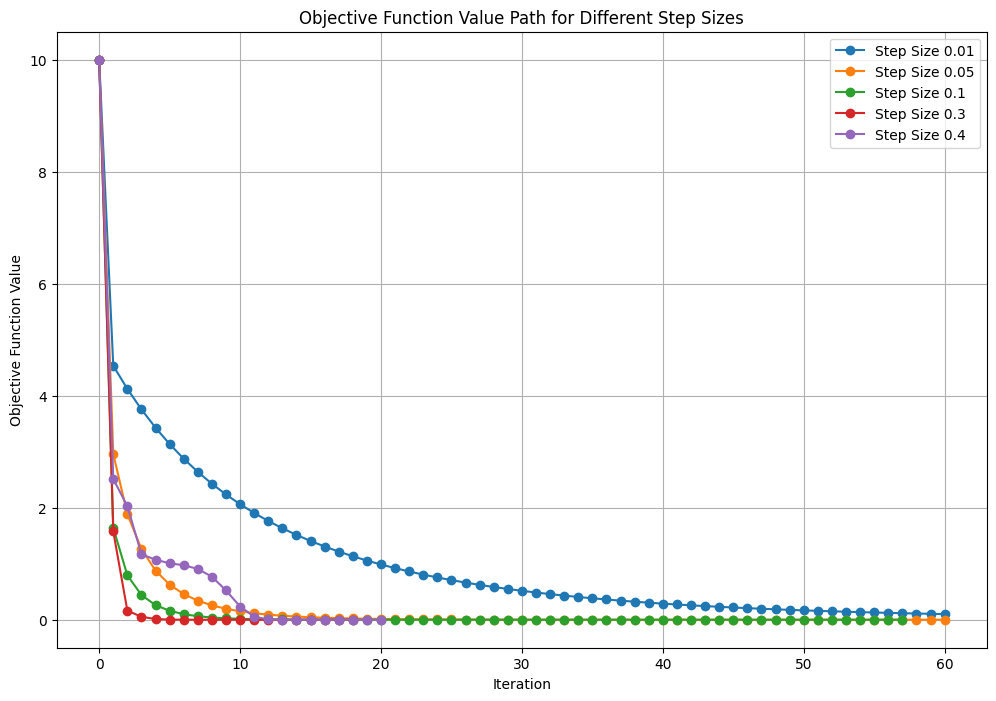

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def objective_function(x):
    return x[0]**2 + x[1]**2 + x[2]**2 - 2*x[0]*x[1]*x[2]

def gradient_projection_method(initial_x, step_size, max_iter=1000, tol=1e-6):
    x = np.array(initial_x, dtype=float)
    history = [x.copy()]
    obj_history = [objective_function(x)]

    for _ in range(max_iter):
        grad = np.array([2*x[0] - 2*x[1]*x[2],
                         2*x[1] - 2*x[0]*x[2],
                         2*x[2] - 2*x[0]*x[1]])

        x_next = x - step_size * grad

        x_next[0] = max(x_next[0], -1)
        x_next[1] = max(x_next[1], -2)
        x_next[2] = max(x_next[2], -3)

        history.append(x_next.copy())
        obj_history.append(objective_function(x_next))

        if np.linalg.norm(x_next - x) < tol:
            break

        x = x_next

    return np.array(history), obj_history

initial_x = [-2, -1, -1]
step_sizes = [ 0.01, 0.05, 0.1,0.3,  0.4,]
max_iter = 60
tol = 1e-6

results = {}
obj_histories = {}

for step_size in step_sizes:
    result, obj_history = gradient_projection_method(initial_x, step_size, max_iter, tol)
    results[step_size] = result
    obj_histories[step_size] = obj_history

plt.figure(figsize=(12, 8))
for step_size in step_sizes:
    plt.plot(range(len(obj_histories[step_size])), obj_histories[step_size], label=f'Step Size {step_size}', marker='o')

plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value Path for Different Step Sizes')
plt.legend()
plt.grid(True)
plt.show()


**Step Size 0.01:**
Convergence is slow, and the values change gradually.

**Step Size 0.05:** Convergence is faster compared to 0.01, with more noticeable changes in variable values per iteration.

**Step Size 0.1:** Faster convergence, significant changes in the first few iterations, and reaching near-optimal values quickly.

**Step Size 0.3:** Rapid convergence, substantial changes in initial iterations, indicating an efficient descent towards optimal values.

**Step Size 0.5**: The convergence behavior is erratic, showing potential instability with overflow and invalid value warnings. This suggests that too large a step size can lead to numerical instability and divergence.

**Conclusion:**
as step size tends to a specific number between 0.3 and 0.4, speed of convergence will be faster but from that specific number, it will cause instability and diverge!